In [96]:
import pandas as pd
import os

In [97]:
df=pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.head()

all_months_data.to_csv("all_data.csv", index=False)

na_vals = ['NA', 'Missing']
df = pd.read_csv("all_data.csv",na_values=na_vals)

df



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [98]:
df['Month'] = df['Order Date'].str[0:2]
df

df[pd.isnull(df).any(axis=1)]

### REMOVE NA
df=df.dropna(how='all')

## GET RID OF 'OR'
df = df[df['Order Date'].str[0:2] != 'Or']

df['Month'] = df['Month'].astype('int32')

### CHANGE STR TO NUMBER
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])

    Add a Sales Column

In [99]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# RECAP ON FUNCTIONS

In [100]:
import re
df = df.rename(columns={'Purchase Address':'Address'})
df

#Gets number of sales more than $100, showing only 3 columns
df.loc[df['Sales'] > 100, ['Product', 'Order ID', 'Address']]

#Filters Products and Order ID in Los Angeles
df.loc[df['Address'].str.contains('Boston, MA'), ['Product', 'Order ID', 'Address']]

#Edit Values inside
df.loc[df['Product'] == 'Bose Headphones', ['Quantity Ordered', 'Price Each']] = [3, 100]

df.loc[df['Product'] == 'Wired Headphones', ['Price Each']] = [20]
df

#Set functions
def update_product(x):
    return x.lower()

#set all products to lower case
df['Product'].apply(update_product)

#Find all products with google phone and wired headphones
df.loc[df['Product'].isin(['Google Phone', 'Wired Headphones'])]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Address,Month,Sales
3,176560,Google Phone,1,600.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,20.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,20.0,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
10,176566,Wired Headphones,1,20.0,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,11.99
11,176567,Google Phone,1,600.0,04/18/19 17:18,"444 7th St, Los Angeles, CA 90001",4,600.00
...,...,...,...,...,...,...,...,...
186798,259309,Wired Headphones,1,20.0,09/09/19 12:55,"865 Ridge St, Atlanta, GA 30301",9,11.99
186801,259312,Wired Headphones,1,20.0,09/02/19 19:51,"573 Sunset St, San Francisco, CA 94016",9,11.99
186803,259314,Wired Headphones,1,20.0,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99
186818,259328,Wired Headphones,1,20.0,09/18/19 10:13,"877 Lincoln St, Boston, MA 02215",9,11.99


In [106]:
#Split Information
df[['Street', 'City', 'State']] = df['Address'].str.split(', ', expand=True) 
df

df[['State', 'Postal Code']] = df['State'].str.split(' ', expand=True)
df

#Adding Rows using append function
df.append({'Product' : 'Huawei P30 Pro', 'Quantity Ordered' : 1}, ignore_index=True)

#Removing rows by searching keyword and getting index of the keyword
filt_huawei = df['Product'].str.contains('Huawei')
df.drop(index=df[filt_huawei].index)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Address,Month,Sales,Street,City,State,Postal Code
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA,02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA,90001
4,176560,Wired Headphones,1,20.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA,90001
5,176561,Wired Headphones,1,20.00,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA,90001
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,840 Highland St,Los Angeles,CA,90001
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,216 Dogwood St,San Francisco,CA,94016
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,220 12th St,San Francisco,CA,94016
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,511 Forest St,San Francisco,CA,94016


### Sort by

In [129]:
#Sorting Values by
df.sort_values(by=['State', 'City'])

#Sort by index
df.sort_index()

#Sort by columns
df[['Month', 'Sales']].sort_values(by=['Month','Sales'], ascending=[True, False])

#Find largest values in a certain column
df['Sales'].nlargest(10)

df.nlargest(10, 'Sales')

,Month,Sales
76338,1,1999.98
42080,1,1700.00
67558,1,1700.00
67602,1,1700.00
67629,1,1700.00
...,...,...
55492,12,2.99
55493,12,2.99
55501,12,2.99
142244,12,2.99


#### Making Groups

In [1]:
df['Product'].value_counts()

#Group all states in States column
state_grp = df.groupby(['State'])

state_grp.get_group('CA')

df.groupby(['State']).get_group('CA')

# Locate Product in CA State
df.loc[df['State'] == 'CA',['Product'] == 'iPhone'].value_counts() #method 1
state_grp['Product'].value_counts().loc['GA'] #method 2

#Locate Product in Each state
state_grp['Product'].value_counts().head() #method 1
df.groupby(['State'])['Product'].value_counts().head(50) #method 2

#state_grp['Product'].value_counts(normalize=True).loc['GA']

#df.groupby(['State'])['Sales'].agg(['sum', 'mean'])



NameError: name 'df' is not defined

In [246]:
#Get Headphones in CA 
df.loc[df['State'] == 'CA'] ['Product'].str.contains('Headphones').sum()

state_grp['Product'].apply(lambda x : x.str.contains('Headphones'))

state_respondents = df['State'].value_counts()
state_respondents




CA    74337
NY    24876
TX    24725
MA    19934
GA    14881
WA    14732
OR    10010
ME     2455
Name: State, dtype: int64

In [244]:
state_respondents
iphone

State
CA    2777
GA     542
MA     752
ME      79
NY     881
OR     370
TX     896
WA     545
Name: Product, dtype: int64

#### GroupBy Functions

In [242]:
state_grp = df.groupby(['State'])
iphone = state_grp['Product'].apply(lambda x : x.str.contains('iPhone').sum())
iphone

state_respondents

df_iphone = pd.concat([state_respondents, iphone], axis='columns', sort=False)
df_iphone

df_iphone.rename(columns = {'State' : 'Respondents', 'Product' : 'iphone_users'}, inplace=True)
df_iphone

df_iphone['percentage'] = (df_iphone['iphone_users'] / df_iphone['Respondents']) * 100
df_iphone.sort_values(by='percentage', ascending=False)

,Respondents,iphone_users,percentage
MA,19934,752,3.772449
CA,74337,2777,3.735690
WA,14732,545,3.699430
OR,10010,370,3.696304
GA,14881,542,3.642228
TX,24725,896,3.623862
NY,24876,881,3.541566
ME,2455,79,3.217923


In [245]:
df_iphone.loc['MA']

Respondents     19934.000000
iphone_users      752.000000
percentage          3.772449
Name: MA, dtype: float64

In [248]:
df.isna()
df.dropna(axis='index', how='any', subset=['Address'])
df.replace('NA', np.nan)
df.fillna('N/A')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Address,Month,Sales,Street,City,State,Postal Code
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA,02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA,90001
4,176560,Wired Headphones,1,20.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA,90001
5,176561,Wired Headphones,1,20.00,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA,90001
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,840 Highland St,Los Angeles,CA,90001
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,216 Dogwood St,San Francisco,CA,94016
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,220 12th St,San Francisco,CA,94016
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,511 Forest St,San Francisco,CA,94016


### WHAT WAS THE BEST MONTH FOR SALES?

In [29]:
## WHAT WAS THE BEST MONTH FOR SALES?
df.groupby(['Month']).sum().sort_values('Sales', ascending=False)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
4,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
5,18667,3135125.13,3152606.75
3,17005,2791207.83,2807100.38
7,16072,2632539.56,2647775.76
6,15253,2562025.61,2577802.26
8,13448,2230345.42,2244467.88


In [30]:
results = df.groupby(['Month']).sum()

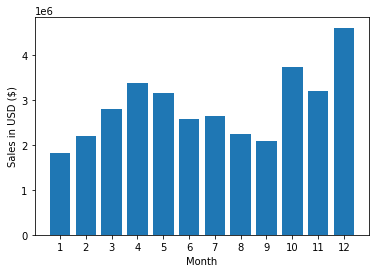

In [31]:
import matplotlib.pyplot as plt


months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()


In [32]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


<function matplotlib.pyplot.show(close=None, block=None)>

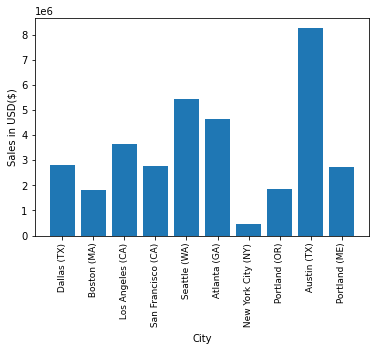

In [33]:


### Add a City Column

def get_city(purchase_address):
    return purchase_address.split(',')[1]

def get_state(purchase_address):
    return purchase_address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")


#df.head()

results = df.groupby('City').sum()

cities=df['City'].unique()

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=9)
plt.xlabel('City')
plt.ylabel('Sales in USD($)')
plt.show

In [34]:
results = pd.groupby('City').sum()
results

AttributeError: module 'pandas' has no attribute 'groupby'

### What time should we display advertisements to maximize likelihood of customer's buying product?

In [35]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [36]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [37]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


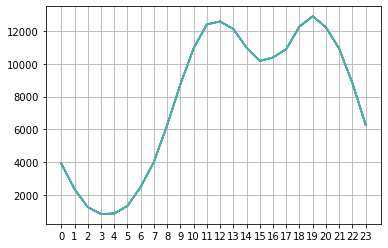

,Quantity Ordered,Price Each,Month,Sales,Minute
Hour,,,,,
19,14470,2398588.31,91389,2412938.54,381042
12,14202,2299876.68,89161,2316821.34,368679
11,14005,2288855.18,87654,2300610.24,368952
20,13768,2268185.16,86375,2281716.24,354086
18,13802,2207696.93,86421,2219348.30,371688


In [38]:
hours = [hour for hour, df in df.groupby('Hour')]

plt.plot(hours, df.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()

df_mostsales = df.groupby(['Hour']).sum().sort_values('Sales', ascending=False)
df_mostsales.head(5)

#df.groupby(['Hour']).count()

#My recommendation is around 11am and 7pm

### What products are most often sold together?

In [39]:
df_new = df[df['Order ID'].duplicated(keep=False)]

df_new['Grouped'] = df_new.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

df_new=df_new[['Order ID', 'Grouped']].drop_duplicates()

df_new.head(20)

C:\Users\ryanb\AppData\Local\Temp/ipykernel_12512/1781769058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Grouped'] = df_new.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
129,176681,"Apple Airpods Headphones, ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones, AAA Batteries (4-p..."
189,176739,"34in Ultrawide Monitor, Google Phone"
225,176774,"Lightning Charging Cable, USB-C Charging Cable"
233,176781,"iPhone, Lightning Charging Cable"


In [40]:
from itertools import combinations
from collections import Counter


count = Counter()

for row in df_new['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key,value)
#count.most_common(10)

#The iPhone and Lighning charging cable is the most common





('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


### What product sold the most and why do you think it sold the most

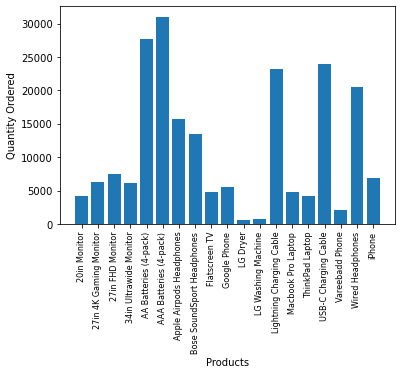

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
USB-C Charging Cable,23975,261740.85,154819,286501.25,314645,647586
Lightning Charging Cable,23217,323787.10,153092,347094.15,312529,634442
Wired Headphones,20557,226395.18,133397,246478.43,271720,554023


In [41]:
df.groupby('Product').sum().sort_values('Quantity Ordered', ascending=False).head(1)

product = df.groupby('Product')

quantity_ordered = product.sum()['Quantity Ordered']

products = [product for product, df in product]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()
df.groupby('Product').sum().sort_values('Quantity Ordered', ascending=False).head()

C:\Users\ryanb\AppData\Local\Temp/ipykernel_12512/1622495597.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


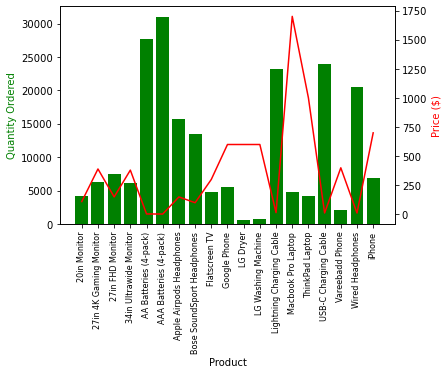

In [42]:
prices=df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered,color='g')
ax2.plot(products, prices, 'r')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

In [43]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
